In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.model_selection import train_test_split
from sklearn.linear_model import PassiveAggressiveRegressor

data = pd.read_csv(r"C:\Users\ACER\Downloads\Instagram data.csv", encoding = 'latin1')
print(data.head())
data.tail()

   Impressions  From Home  From Hashtags  From Explore  From Other  Saves  \
0         3920       2586           1028           619          56     98   
1         5394       2727           1838          1174          78    194   
2         4021       2085           1188             0         533     41   
3         4528       2700            621           932          73    172   
4         2518       1704            255           279          37     96   

   Comments  Shares  Likes  Profile Visits  Follows  \
0         9       5    162              35        2   
1         7      14    224              48       10   
2        11       1    131              62       12   
3        10       7    213              23        8   
4         5       4    123               8        0   

                                             Caption  \
0  Here are some of the most important data visua...   
1  Here are some of the best data science project...   
2  Learn how to train a machine learni

,Impressions,From Home,From Hashtags,From Explore,From Other,Saves,Comments,Shares,Likes,Profile Visits,Follows,Caption,Hashtags
114,13700,5185,3041,5352,77,573,2,38,373,73,80,Here are some of the best data science certifi...,#datascience #datasciencejobs #datasciencetrai...
115,5731,1923,1368,2266,65,135,4,1,148,20,18,Clustering is a machine learning technique use...,#machinelearning #machinelearningalgorithms #d...
116,4139,1133,1538,1367,33,36,0,1,92,34,10,Clustering music genres is a task of grouping ...,#machinelearning #machinelearningalgorithms #d...
117,32695,11815,3147,17414,170,1095,2,75,549,148,214,Here are some of the best data science certifi...,#datascience #datasciencejobs #datasciencetrai...
118,36919,13473,4176,16444,2547,653,5,26,443,611,228,175 Python Projects with Source Code solved an...,#python #pythonprogramming #pythonprojects #py...


In [8]:
data.isnull().sum()

Impressions       0
From Home         0
From Hashtags     0
From Explore      0
From Other        0
Saves             0
Comments          0
Shares            0
Likes             0
Profile Visits    0
Follows           0
Caption           0
Hashtags          0
dtype: int64

In [10]:
data = data.dropna()

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119 entries, 0 to 118
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Impressions     119 non-null    int64 
 1   From Home       119 non-null    int64 
 2   From Hashtags   119 non-null    int64 
 3   From Explore    119 non-null    int64 
 4   From Other      119 non-null    int64 
 5   Saves           119 non-null    int64 
 6   Comments        119 non-null    int64 
 7   Shares          119 non-null    int64 
 8   Likes           119 non-null    int64 
 9   Profile Visits  119 non-null    int64 
 10  Follows         119 non-null    int64 
 11  Caption         119 non-null    object
 12  Hashtags        119 non-null    object
dtypes: int64(11), object(2)
memory usage: 12.2+ KB


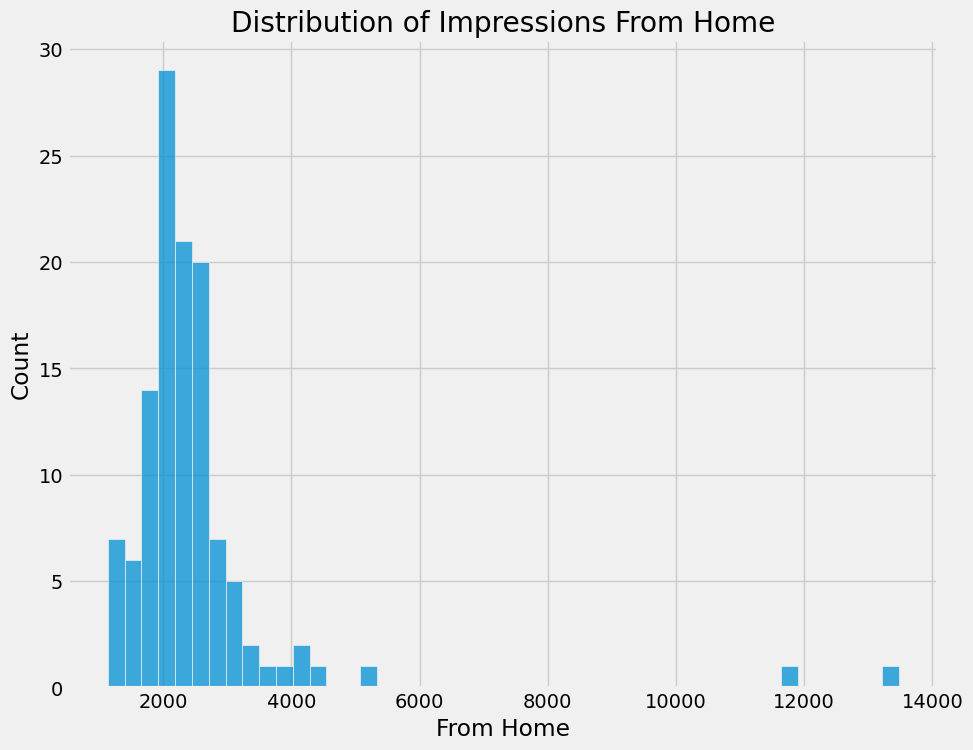

In [15]:
plt.figure(figsize=(10, 8))
plt.style.use('fivethirtyeight')
plt.title("Distribution of Impressions From Home")
sns.histplot(data['From Home'])
plt.show()

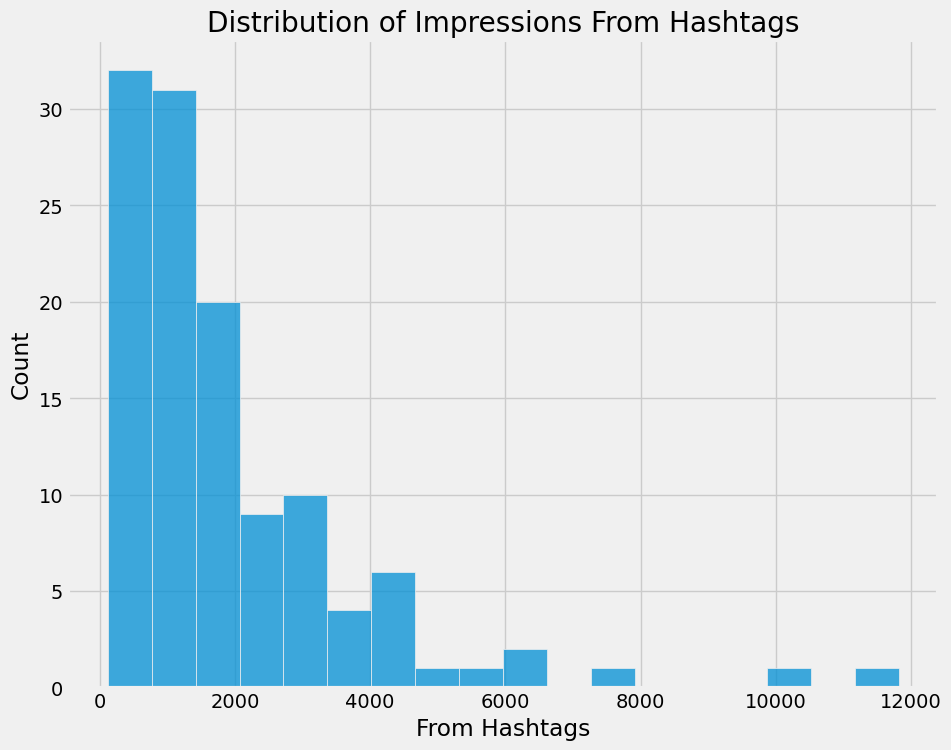

In [41]:
plt.figure(figsize=(10, 8))
plt.style.use('fivethirtyeight')
plt.title("Distribution of Impressions From Hashtags")
sns.histplot(data['From Hashtags'])
plt.show()

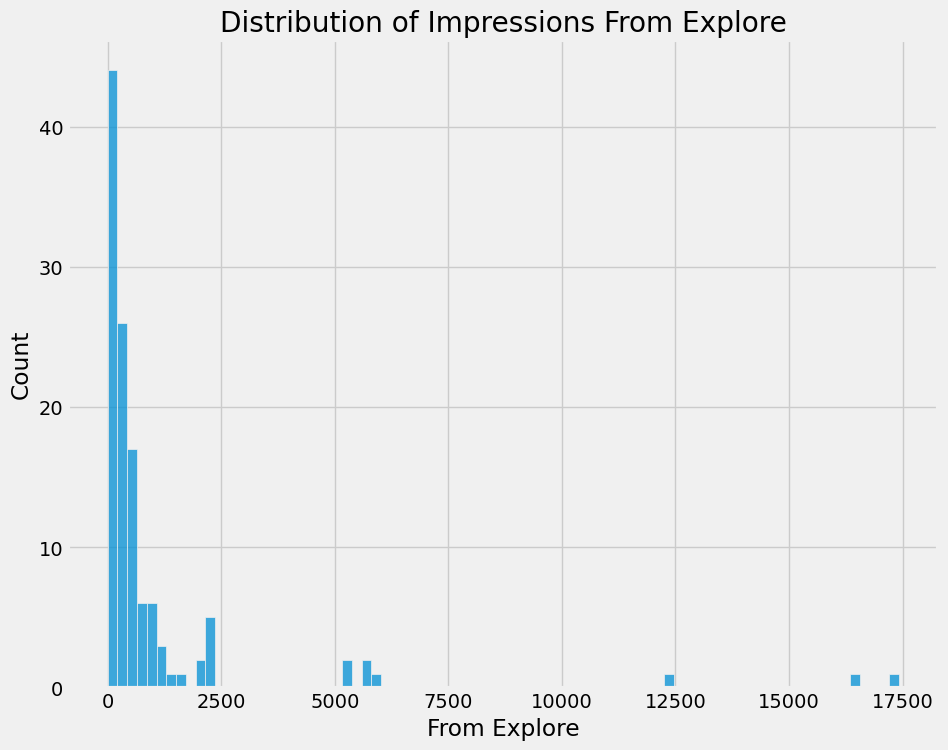

In [43]:
plt.figure(figsize=(10, 8))
plt.style.use('fivethirtyeight')
plt.title("Distribution of Impressions From Explore")
sns.histplot(data['From Explore'])
plt.show()

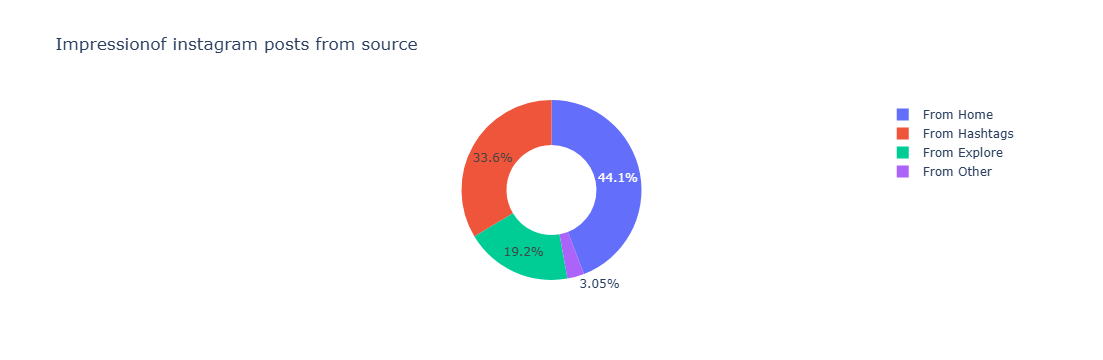

In [37]:
home = data["From Home"].sum()
hashtag = data["From Hashtags"].sum()  
explore = data["From Explore"].sum()
other = data["From Other"].sum()


labels = ["From Home", "From Hashtags", "From Explore", "From Other"]
values = [home, hashtag, explore, other]

fig = px.pie(data, values=values, names=labels, title="Impressionof instagram posts from source", hole=0.5)
fig.show()
          


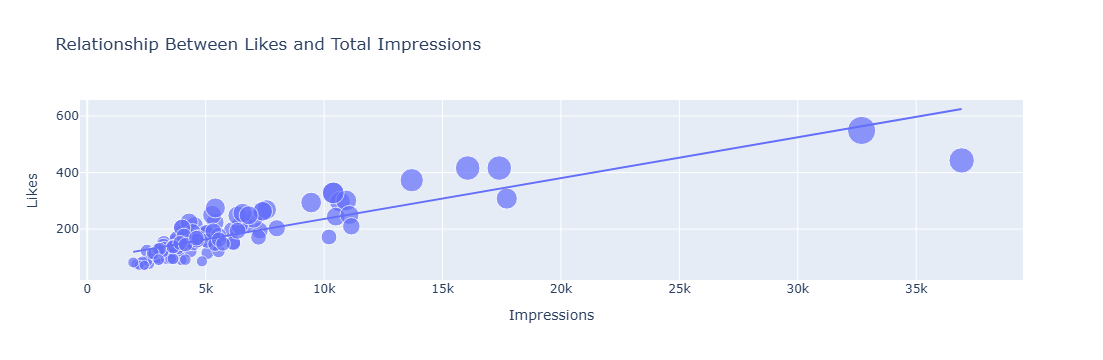

In [23]:
figure = px.scatter(data_frame = data, x="Impressions", y="Likes", size="Likes", trendline="ols", title="Relationship Between Likes and Total Impressions")

figure.show()

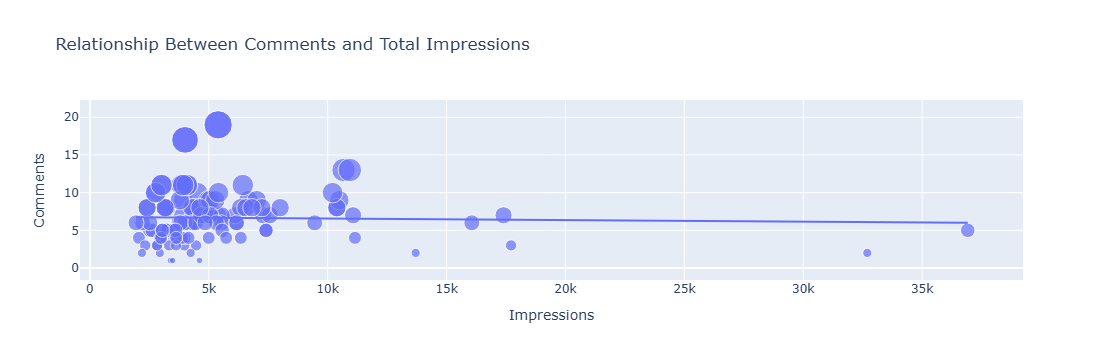

In [25]:
figure = px.scatter(data_frame = data, x="Impressions", y="Comments", size="Comments", trendline="ols", title="Relationship Between Comments and Total Impressions")

figure.show()

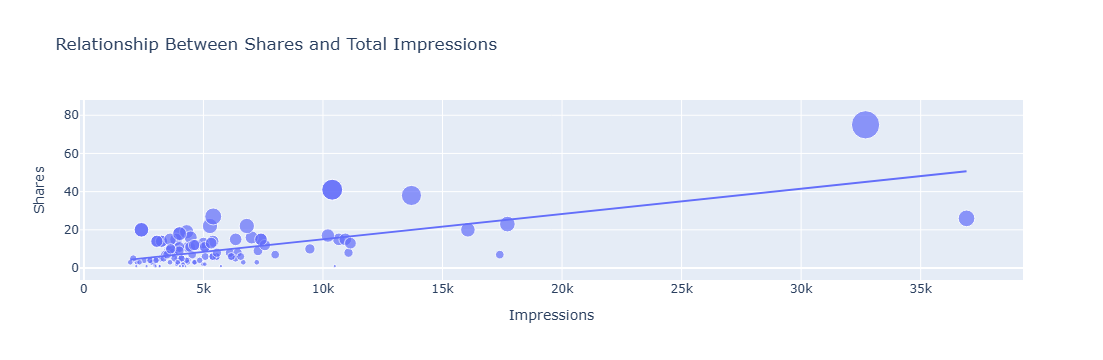

In [27]:
figure = px.scatter(data_frame = data, x="Impressions", y="Shares", size="Shares", trendline="ols", title="Relationship Between Shares and Total Impressions")

figure.show()

In [14]:
correlation = data.select_dtypes(include='number').corr()
print(correlation["Impressions"].sort_values(ascending=False))

Impressions       1.000000
From Explore      0.893607
Follows           0.889363
Likes             0.849835
From Home         0.844698
Saves             0.779231
Profile Visits    0.760981
Shares            0.634675
From Other        0.592960
From Hashtags     0.560760
Comments         -0.028524
Name: Impressions, dtype: float64


In [16]:
conversion_rate = (data["Follows"].sum() / data["Profile Visits"].sum()) * 100
print(conversion_rate)

41.00265604249668


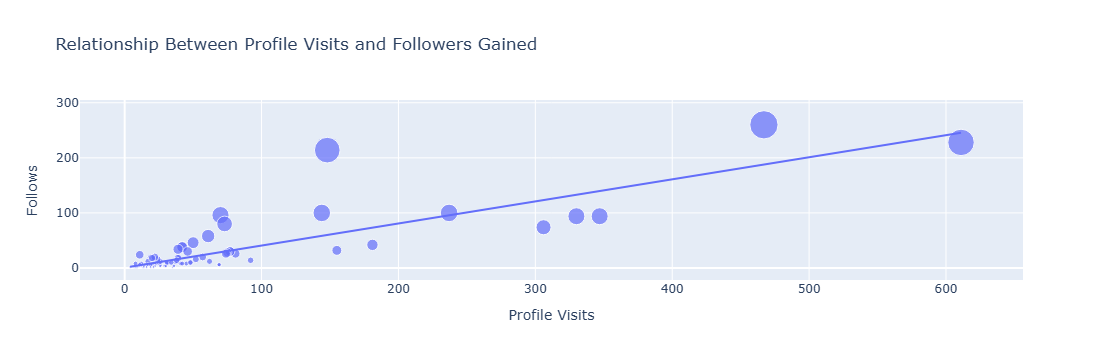

In [20]:
figure = px.scatter(data_frame = data, x="Profile Visits", y="Follows", size="Follows", trendline="ols", title = "Relationship Between Profile Visits and Followers Gained")
figure.show()

In [30]:
x = np.array(data[['Likes', 'Saves', 'Comments', 'Shares', 
                   'Profile Visits', 'Follows']])
y = np.array(data["Impressions"])
xtrain, xtest, ytrain, ytest = train_test_split(x, y, 
                                                test_size=0.2, 
                                                random_state=42)

In [32]:
model = PassiveAggressiveRegressor()
model.fit(xtrain, ytrain)
model.score(xtest, ytest)

0.847250584129707

In [34]:
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import mean_squared_error

# Load your data into the 'data' DataFrame

x = data[['Likes', 'Saves', 'Comments', 'Shares', 'Profile Visits', 'Follows']].values
y = data['Impressions'].values

xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.2, random_state=42)

# Hyperparameter Tuning using GridSearchCV
param_grid = {
    'C': [0.01, 0.1, 1, 10],  # Regularization parameter
    'fit_intercept': [True, False],
    'max_iter': [100, 200, 300]
}

grid_search = GridSearchCV(PassiveAggressiveRegressor(random_state=42), param_grid, cv=5)
grid_search.fit(xtrain, ytrain)

best_model = grid_search.best_estimator_

# Cross-validation
cv_scores = cross_val_score(best_model, xtrain, ytrain, cv=5)
mean_cv_score = np.mean(cv_scores)

# Model evaluation
ypred = best_model.predict(xtest)
mse = mean_squared_error(ytest, ypred)
r2_score = best_model.score(xtest, ytest)

print("Best Model:", best_model)
print("Cross-Validation Scores:", cv_scores)
print("Mean Cross-Validation Score:", mean_cv_score)
print("Mean Squared Error:", mse)
print("R-squared Score:", r2_score)

Best Model: PassiveAggressiveRegressor(C=0.1, max_iter=100, random_state=42)
Cross-Validation Scores: [0.89161174 0.84784844 0.75784221 0.16179684 0.82389356]
Mean Cross-Validation Score: 0.6965985583823923
Mean Squared Error: 6875968.7196636675
R-squared Score: 0.8229565558025584


In [36]:
# Features = [['Likes','Saves', 'Comments', 'Shares', 'Profile Visits', 'Follows']]
features = np.array([[282.0, 233.0, 4.0, 9.0, 165.0, 54.0]])
model.predict(features)

array([10216.45627995])

In [38]:
# Features = [['Likes','Saves', 'Comments', 'Shares', 'Profile Visits', 'Follows']]
features = np.array([[282.0, 233.0, 4.0, 9.0, 165.0, 54.0]])
best_model.predict(features)

array([10218.01801962])